In [58]:

import cv2
import os
from mtcnn import MTCNN

def detect_and_save_faces(image_path, output_dir='detected_faces', grays=True, resize=True, show=True):
    # Load the image
    image = cv2.imread(image_path)

    # Detect faces in the image
    detector = MTCNN()
    faces = detector.detect_faces(image)

    # Create a directory to store the face images
    os.makedirs(output_dir, exist_ok=True)

    # Save each detected face as a separate image
    for i, face in enumerate(faces):
        x, y, w, h = face['box']
        face_image = image[y:y+h, x:x+w]
        if grays:
            face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        if resize:
            face_image = cv2.resize(face_image, (48, 48), interpolation=cv2.INTER_AREA)
        output_path = os.path.join(output_dir, f'face_{i+38}.jpg')
        cv2.imwrite(output_path, face_image)
        if show:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    if show:
        # Display the image with bounding boxes
        cv2.imshow('Face Detection', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

for emotion in ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral', 'free']:
    for j in [1]:
        image_path = f'original_fotos/{emotion}_class_{j}.jpg'
        detect_and_save_faces(image_path, output_dir=f'emotions/{emotion}', grays=True, resize=True, show=False)



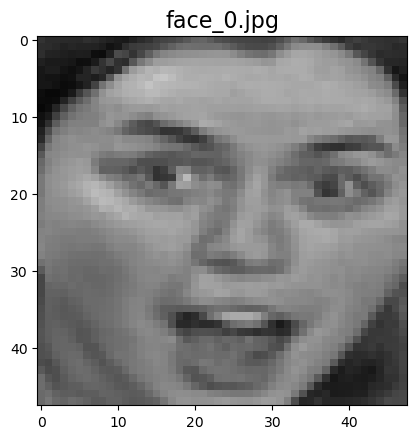

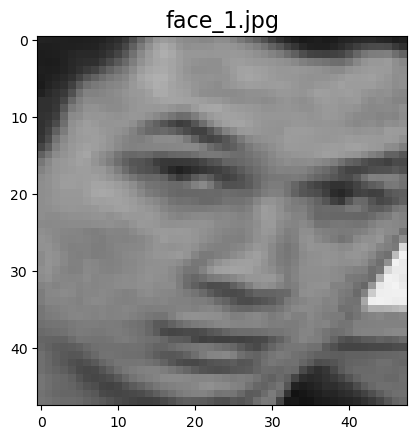

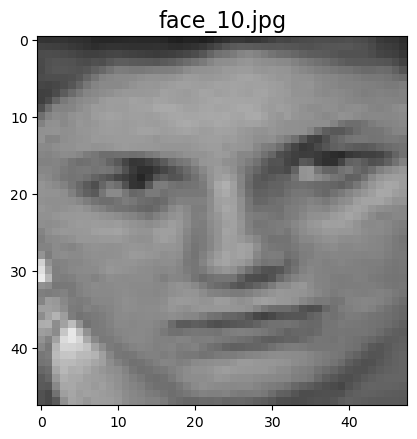

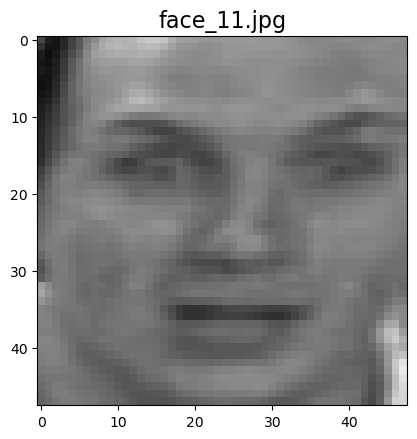

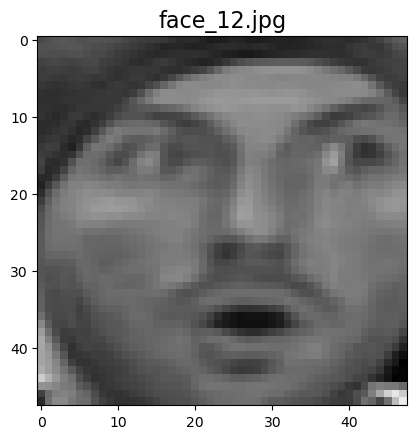

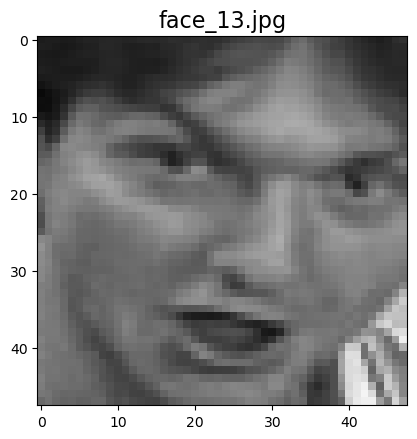

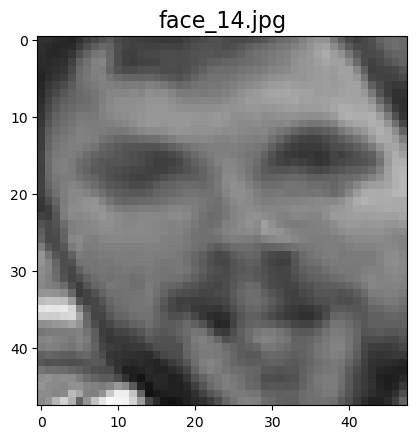

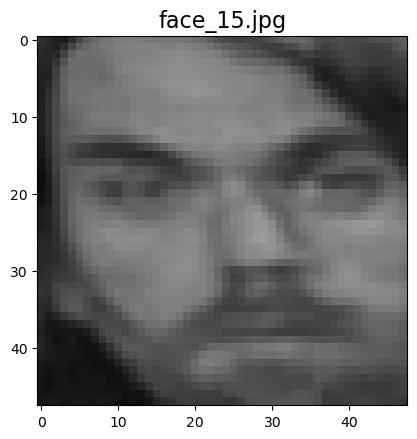

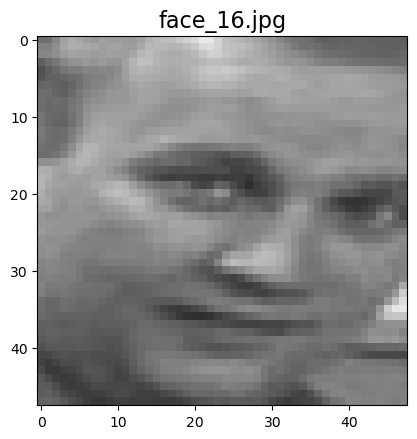

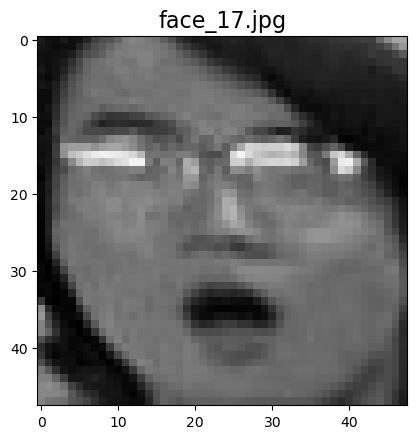

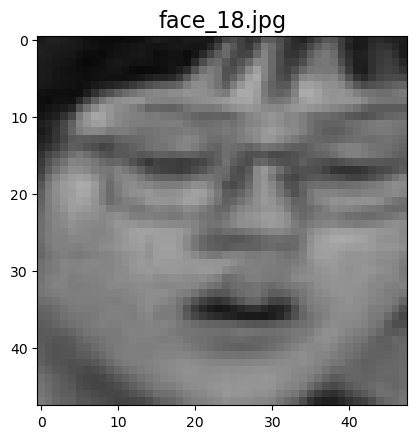

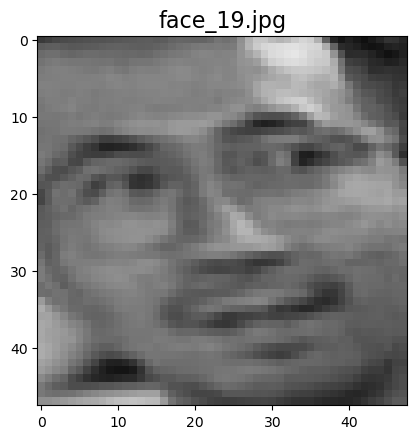

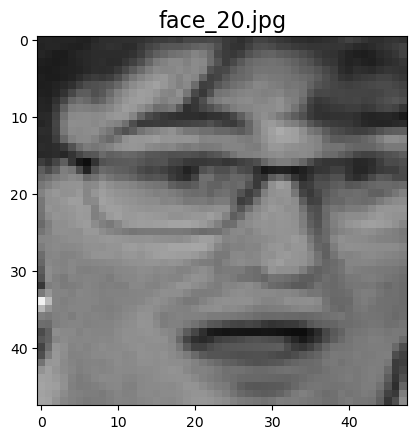

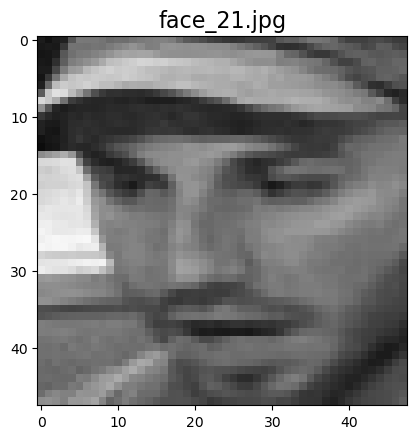

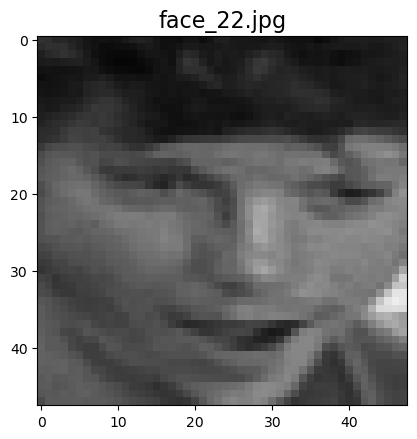

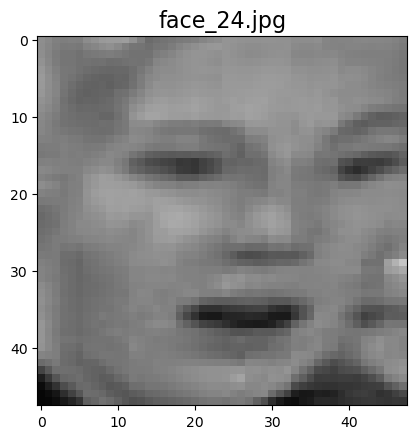

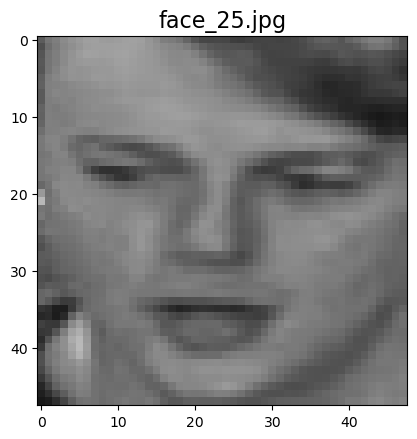

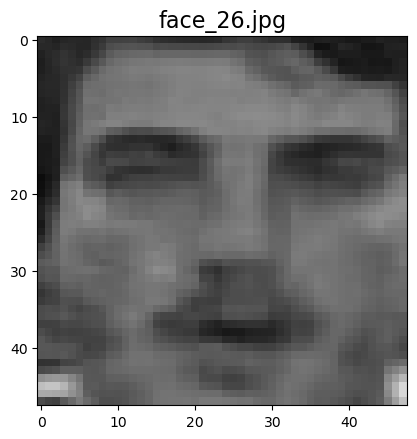

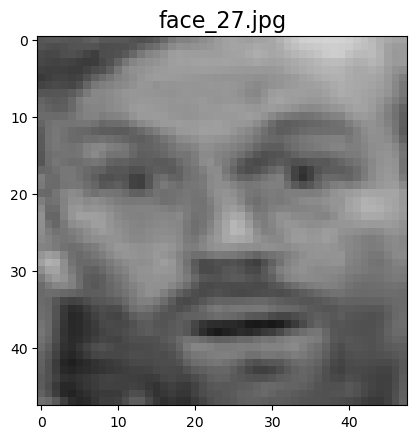

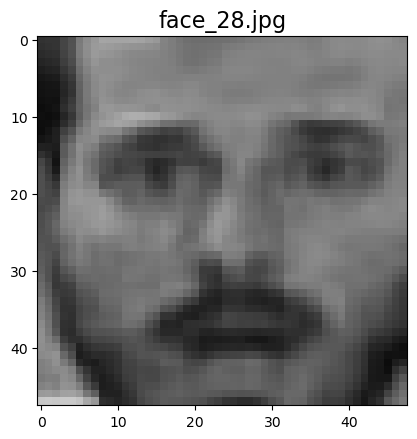

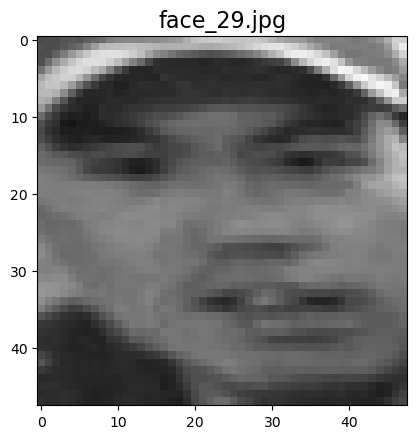

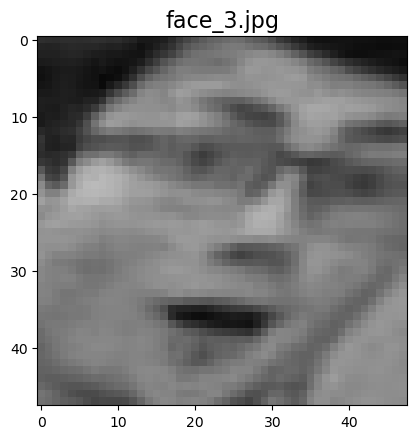

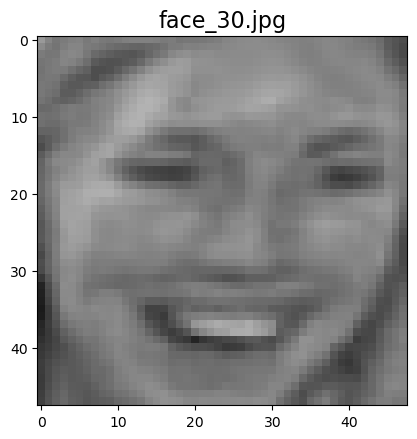

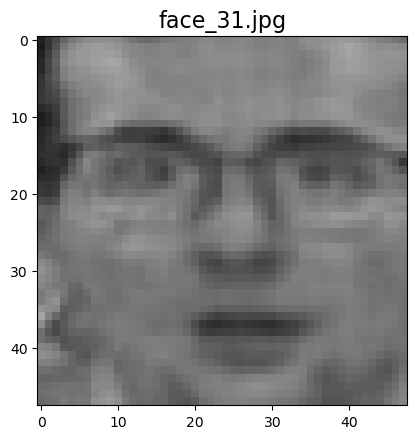

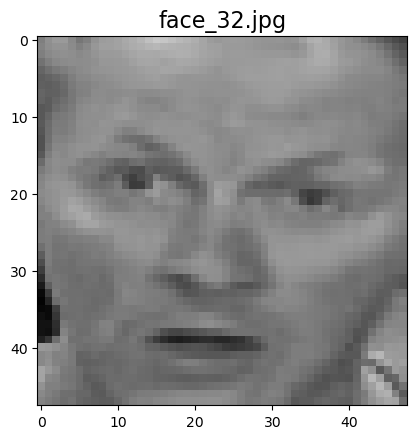

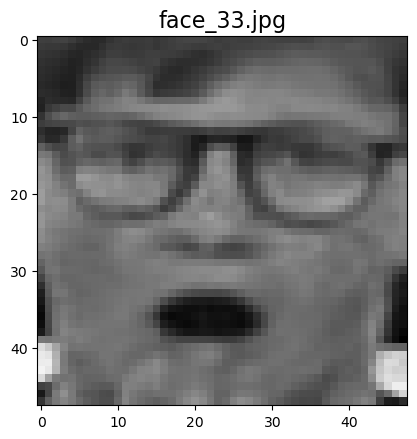

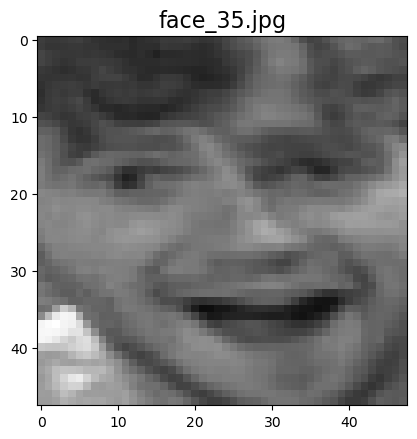

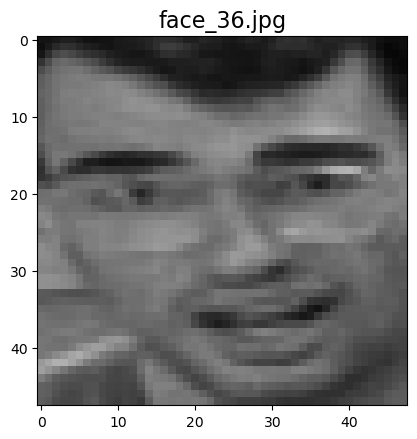

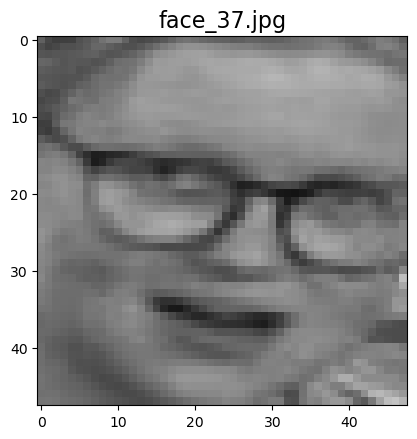

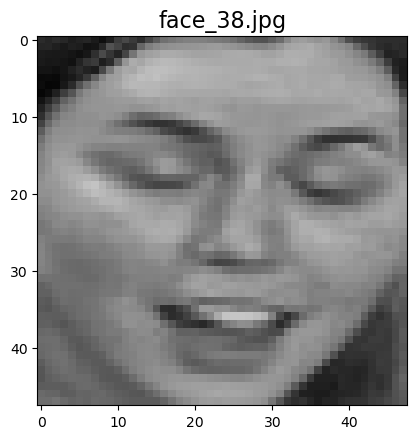

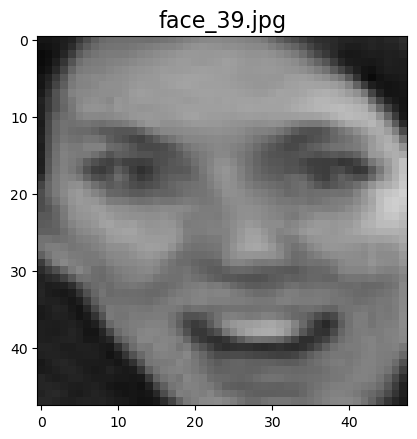

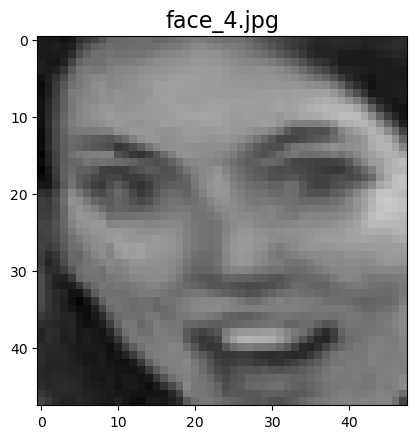

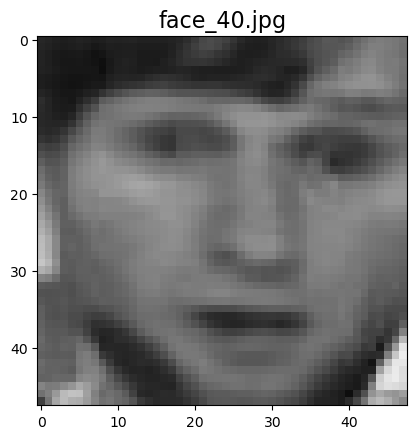

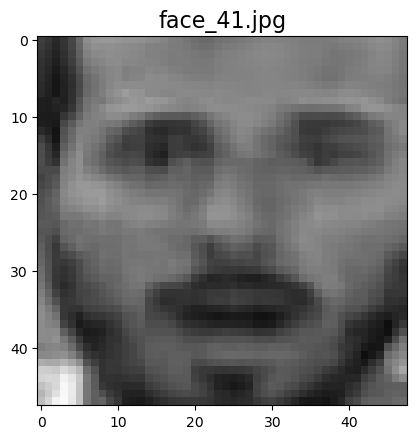

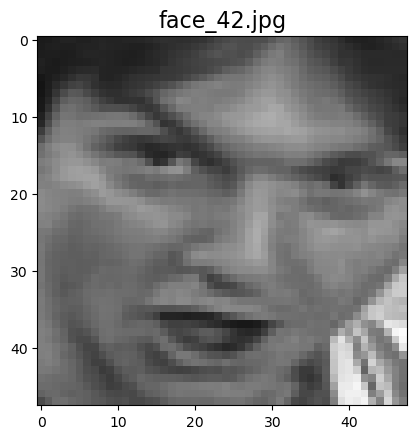

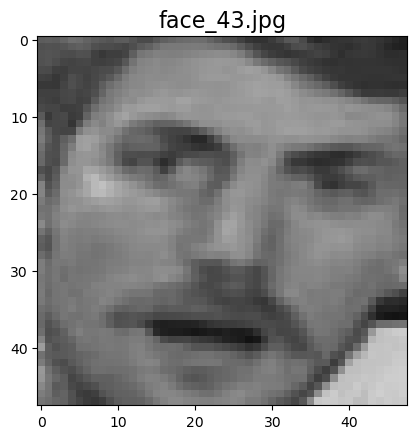

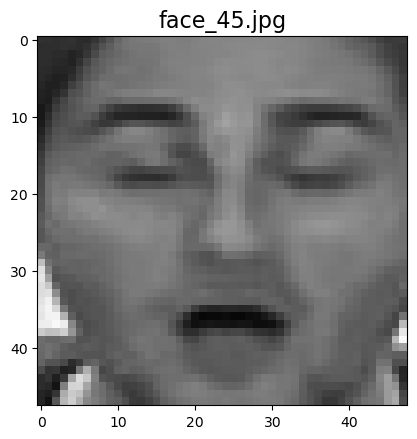

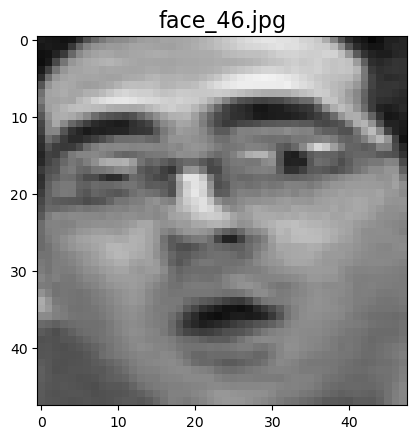

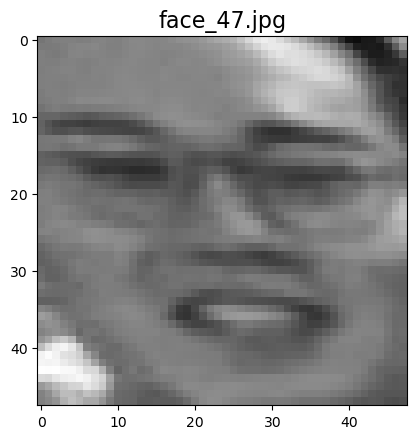

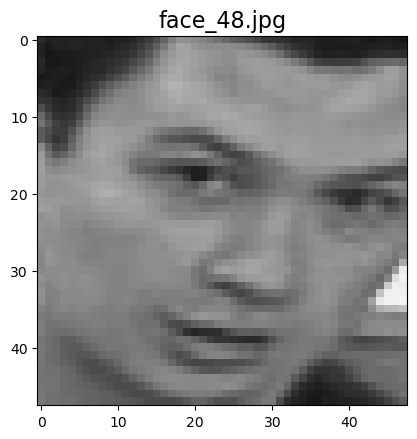

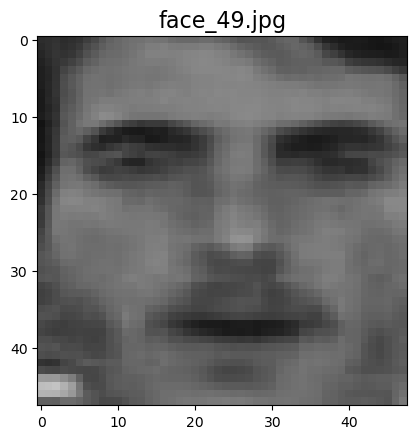

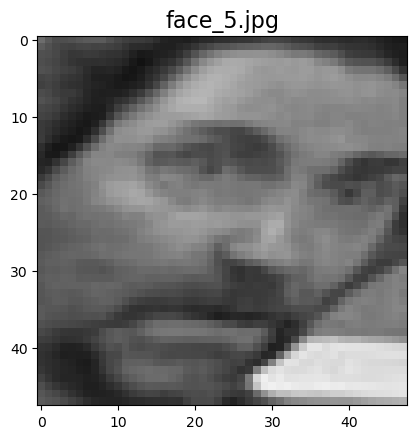

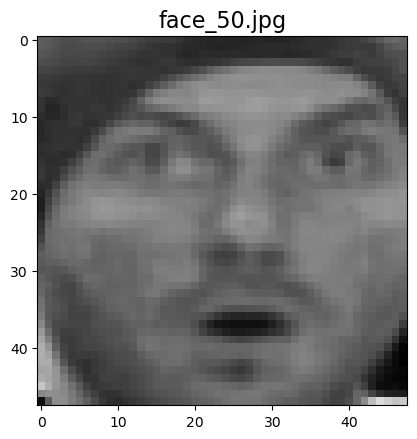

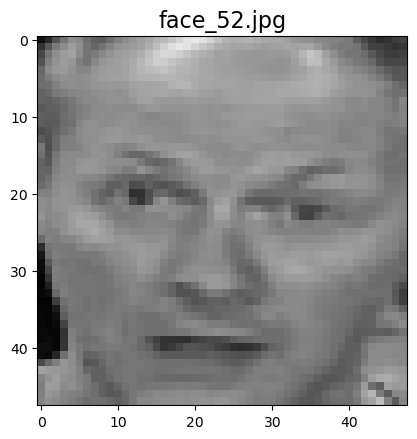

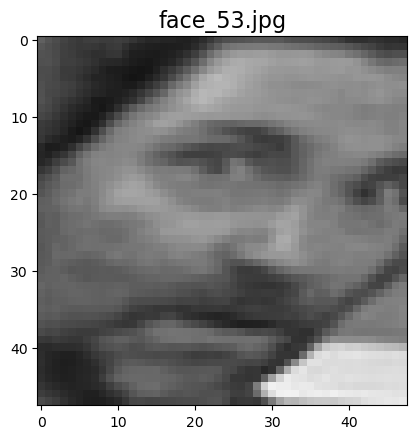

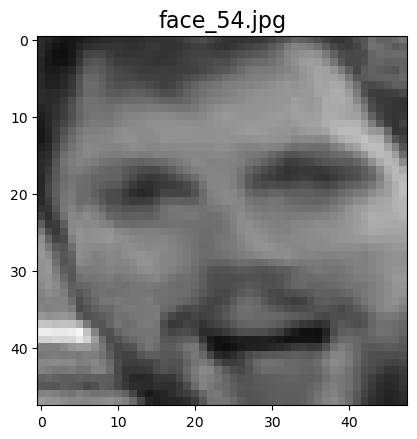

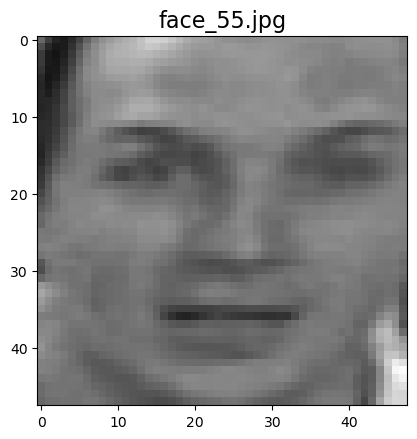

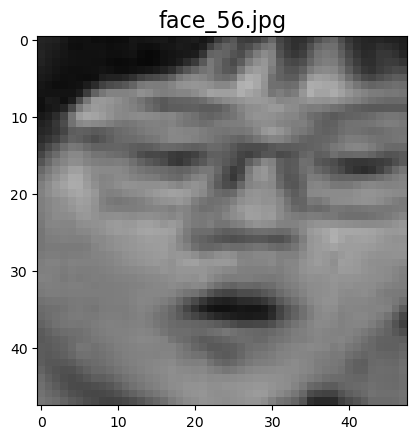

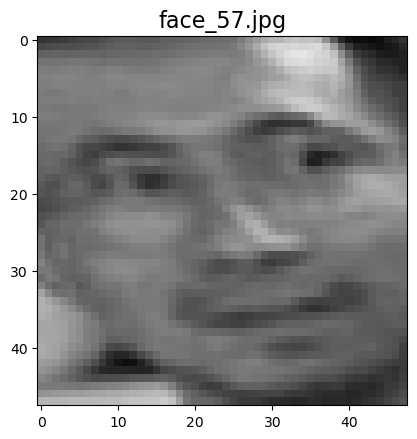

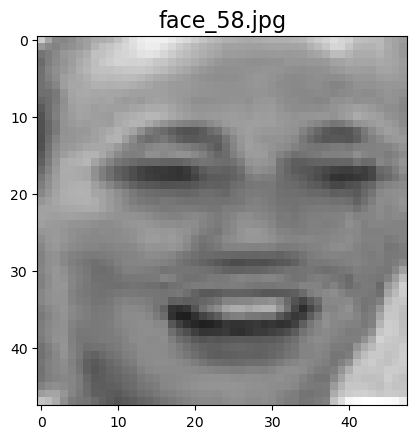

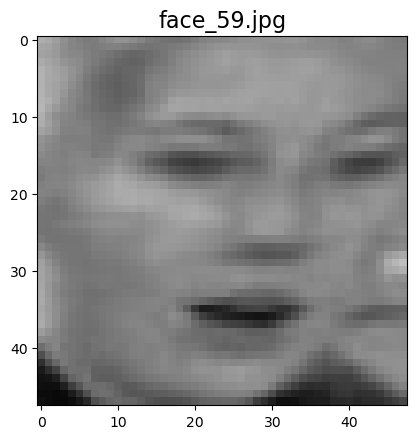

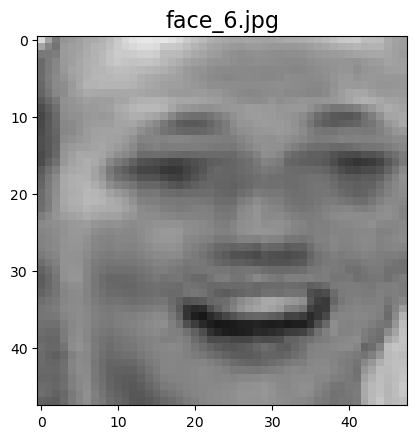

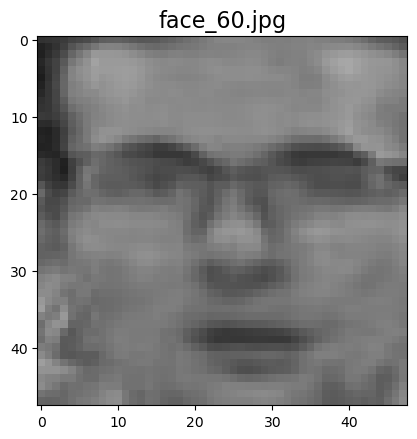

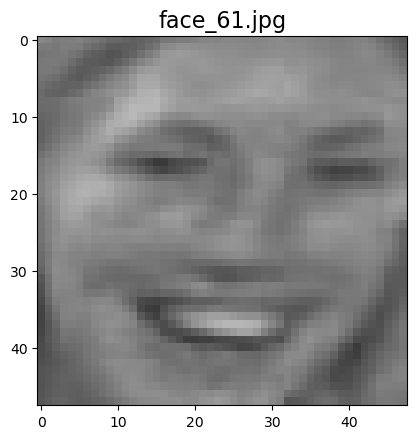

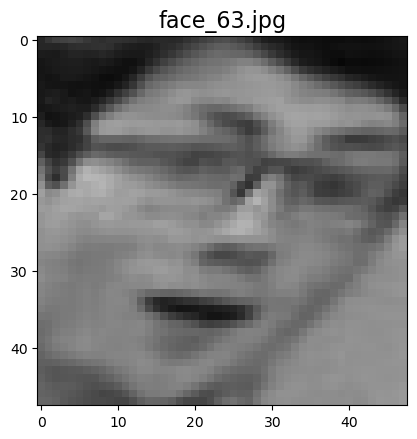

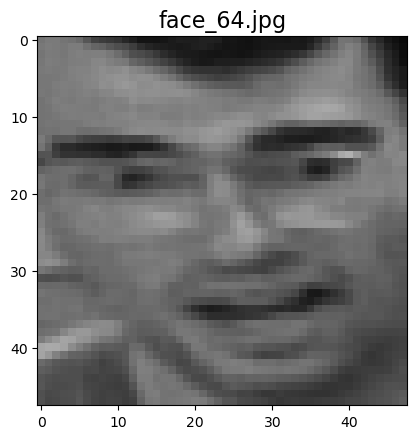

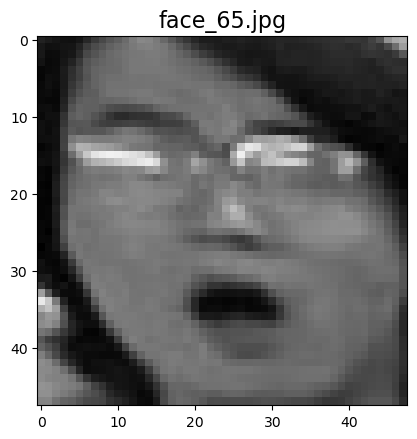

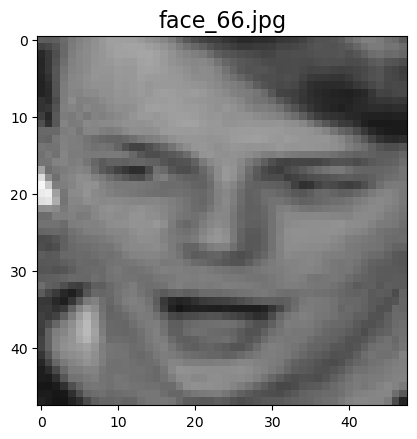

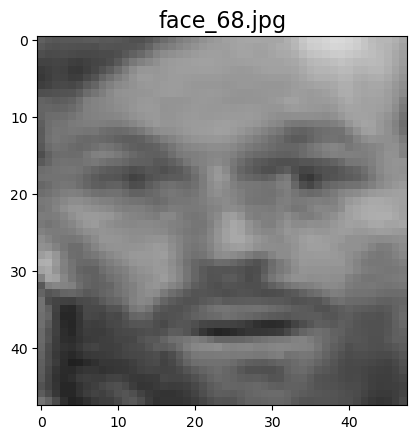

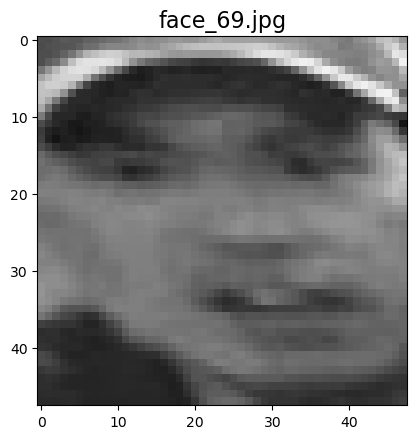

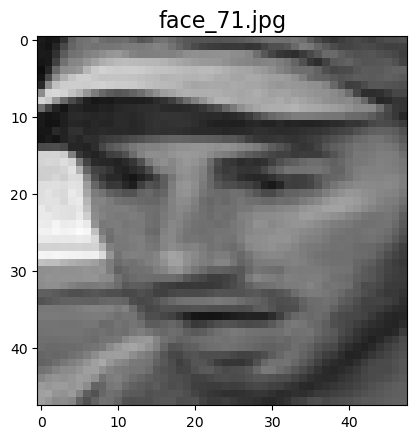

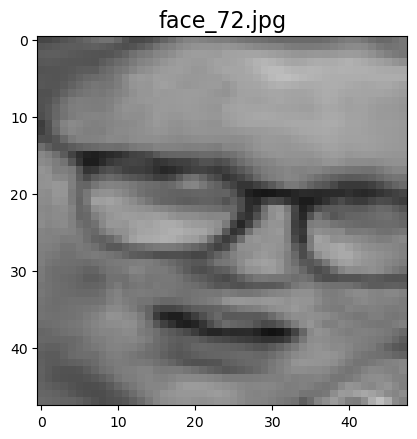

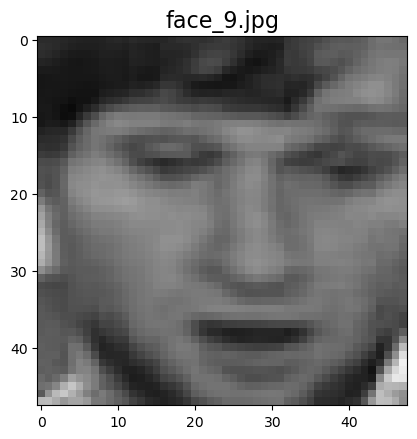

In [85]:
import os
import shutil
import matplotlib.pyplot as plt


def move_file_by_name(file_name, source_dir='angry', destination_dir='angry_discarded'):
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)
    shutil.move(source_path, destination_path)

# discarded = []
# for discard in discarded:
#     move_file_by_name(f'face_{discard}.jpg', source_dir='emotions/free', destination_dir='emotions/discarded/free_discarded')

def print_all_faces_in_folder(dir):
    for file_name in os.listdir(dir):
        image = cv2.imread(os.path.join(dir, file_name))
        plt.imshow(image, cmap='gray')
        plt.title(file_name, fontsize=16)
        plt.show()

print_all_faces_in_folder('emotions/surprised')